# 🔐 Cybersecurity Intrusion Detection Using NSL-KDD Dataset (2009–2011)

---

## 📝 Problem Statement
**Detect malicious network activity from normal network traffic using Machine Learning and Artificial Neural Networks (ANN).**  

The project involves:  
- Preprocessing the NSL-KDD dataset  
- Analyzing network traffic patterns and attack distributions  
- Building predictive models to classify connections as **normal** or **attack**  
- Developing an accurate and deployable **Intrusion Detection System (IDS)**  

---

## 📂 Data Source
The dataset has been obtained from the **NSL-KDD dataset**, an improved version of the original KDD’99 dataset.  

- **Official NSL-KDD website (UNB CIC):** [NSL-KDD Dataset](https://www.unb.ca/cic/datasets/nsl.html)  
- **Kaggle CSV version (recommended for Python):** [Kaggle NSL-KDD](https://www.kaggle.com/datasets/hassan06/nslkdd)  

> The CSV version is easier to load directly into Pandas for ML & ANN projects.

---

## 📊 Dataset Overview
- **Number of rows (observations):**  
  - Training set: 125,973  
  - Testing set: 22,544  

- **Number of columns (features):** 43 + 2 (label + difficulty)  

---

### 🔹 Columns Description

| Column | Description |
|--------|-------------|
| duration | Length of the connection (seconds) |
| protocol_type | Type of network protocol (TCP, UDP, ICMP) |
| service | Network service on the destination (e.g., HTTP, FTP, Telnet) |
| flag | Status flag of the connection (e.g., SF, REJ) |
| src_bytes | Bytes sent from source to destination |
| dst_bytes | Bytes sent from destination to source |
| land | 1 if connection is from/to the same host/port; 0 otherwise |
| wrong_fragment | Number of wrong fragments |
| urgent | Number of urgent packets |
| hot | Number of “hot” indicators (suspicious events) |
| num_failed_logins | Number of failed login attempts |
| logged_in | 1 if successfully logged in, 0 otherwise |
| num_compromised | Number of compromised conditions |
| root_shell | 1 if root shell was obtained |
| su_attempted | 1 if `su root` attempted |
| num_root | Number of root accesses |
| num_file_creations | Number of file creation operations |
| num_shells | Number of shell prompts |
| num_access_files | Number of operations on access files |
| num_outbound_cmds | Number of outbound commands |
| is_host_login | 1 if the login belongs to the host |
| is_guest_login | 1 if the login belongs to a guest account |
| count | Number of connections to the same host in past 2 seconds |
| srv_count | Number of connections to the same service in past 2 seconds |
| serror_rate | % of connections with “SYN” errors |
| srv_serror_rate | % of connections to the same service with “SYN” errors |
| rerror_rate | % of connections with “REJ” errors |
| srv_rerror_rate | % of connections to the same service with “REJ” errors |
| same_srv_rate | % of connections to the same service |
| diff_srv_rate | % of connections to different services |
| srv_diff_host_rate | % of connections to different hosts |
| dst_host_count | Number of connections to the same host in past 100 connections |
| dst_host_srv_count | Number of connections to the same service in past 100 connections |
| dst_host_same_srv_rate | % of connections to the same service as the current host |
| dst_host_diff_srv_rate | % of connections to different services for the current host |
| dst_host_same_src_port_rate | % of connections to the same source port |
| dst_host_srv_diff_host_rate | % of connections to the same service to different hosts |
| dst_host_serror_rate | % of connections with “SYN” errors at host level |
| dst_host_srv_serror_rate | % of connections with “SYN” errors to same service at host level |
| dst_host_rerror_rate | % of connections with “REJ” errors at host level |
| dst_host_srv_rerror_rate | % of connections with “REJ” errors to same service at host level |
| label | Connection type (`normal` or specific attack type e.g., `neptune`, `smurf`) |
| difficulty | Difficulty level of the record (1–21) |

---

### 🎯 Target Labels

- **Normal traffic:**  
  - `normal`  

- **Attack types:**  

  **1. Denial of Service (DoS):** `neptune`, `smurf`, `teardrop`, `pod`, `back`, `land`  
  **2. Probe (Scanning):** `satan`, `ipsweep`, `nmap`, `portsweep`  
  **3. Remote to Local (R2L):** `warezclient`, `guess_passwd`, `ftp_write`, `imap`, `phf`, `multihop`, `warezmaster`, `spy`  
  **4. User to Root (U2R):** `buffer_overflow`, `rootkit`, `loadmodule`, `perl`  

- **Total unique labels:** 23 (1 normal + 22 attack types)  

---

> This dataset will allow us to explore both **binary classification** (Normal vs Attack) and **multi-class classification** (exact attack type or 5 high-level categories: Normal, DoS, Probe, R2L, U2R).


# Importing The Required Libraries : 

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score,precision_score,recall_score,classification_report,f1_score

# Machine Learning Models (Classification)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Deep Learning / ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Data Loading 

In [2]:
# File paths (adjust if needed)
train_path = "KDDTrain+.txt"
test_path = "KDDTest+.txt"

# Column names for NSL-KDD (41 features + labels + difficulty)
columns = [
    "duration","protocol_type","service","flag","src_bytes","dst_bytes",
    "land","wrong_fragment","urgent","hot","num_failed_logins","logged_in",
    "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
    "num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
    "count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
    "same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count",
    "dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
    "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
    "label","difficulty"
]

# Load datasets
train_df = pd.read_csv(train_path, names=columns)
test_df = pd.read_csv(test_path, names=columns)

# Check shape and first rows
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nSample data:")
print(train_df.head())

Train shape: (125973, 43)
Test shape: (22544, 43)

Sample data:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1       

In [3]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
train_df['label'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

# Data Cleaning : 

In [5]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# We can drop the difficulty column from the Dataset as it does not help more for the malicious activity discussion 

In [6]:
train_df.drop(columns = 'difficulty',axis = 1 ,inplace=True)

In [7]:
test_df.drop(columns = 'difficulty',axis = 1 ,inplace=True)

- **_The Above Dataset Has no Null Values It means we do not deal with null values._**

# Checking The Datatypes of the columns : 

In [8]:
train_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# Checking for Duplicates Values in the Dataset : 

In [9]:
train_df.duplicated().sum()

0

# checking some statistical measures : 

In [10]:
# first let's see the description of the data 
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 📊 Insights from Dataset Summary Statistics (Training Set)

- **High Skewness in Features**  
  - Many continuous features (e.g., `duration`, `src_bytes`, `dst_bytes`, `num_compromised`) have very large **maximum values** compared to the mean/median → strong right-skew and presence of extreme outliers.  
  - Example:  
    - `src_bytes`: mean ≈ 45K but max ≈ 1.37B  
    - `dst_bytes`: mean ≈ 19K but max ≈ 1.31B  

- **Sparsity in Many Features**  
  - Several features are **zero for most connections** (median = 0), e.g.,  
    - `duration`, `dst_bytes`, `hot`, `num_failed_logins`, `num_shells`.  
  - Indicates that attacks/normal traffic often do not trigger these attributes, making them highly sparse.

- **Binary/Flag Features**  
  - Features like `land`, `logged_in`, `root_shell`, `su_attempted`, `is_guest_login` behave as binary indicators (0 or 1).  
  - Example: `logged_in` has mean ≈ 0.39, meaning ~39% of records are successful logins.

- **High Variability Across Connection Counts**  
  - Features such as `dst_host_count` and `dst_host_srv_count` have wide ranges (0–255), capturing connection intensity.  
  - `dst_host_same_srv_rate` and similar rate features range from 0 to 1, acting as normalized proportions.

- **Indicators of Suspicious Behavior**  
  - `num_compromised` can reach extremely high values (max = 7479), which is a strong anomaly compared to median = 0.  
  - Suggests this feature is a **critical discriminator** for attacks vs normal.

- **Modeling Implications**  
  - Features with **extreme outliers** may require normalization/log-scaling.  
  - **Sparse/binary features** may be highly informative for certain attack types.  
  - A mix of **continuous (e.g., bytes, counts)** and **categorical/binary flags** ensures models like Random Forests and ANNs can capture both nonlinear patterns and anomaly thresholds.


In [11]:
train_df.describe(include='object')

,protocol_type,service,flag,label
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


## 🔎 Insights from Categorical Features

- **Protocol Type**
  - Only **3 unique protocols** are present: `tcp`, `udp`, `icmp`.
  - `tcp` dominates with ~81% of records (102,689 out of 125,973).

- **Service**
  - Very high diversity with **70 unique services**.
  - `http` is the most common service (~40,338 records, ~32% of data).
  - Indicates that web traffic forms a significant portion of the dataset.

- **Flag**
  - **11 unique connection flags**.
  - `SF` (successful connection with no errors) is the most frequent (~74,945 records, ~59%).
  - Other flags occur less often but may correlate strongly with specific attack types.

- **Label (Target)**
  - **23 unique labels**: 1 normal + 22 attack types.
  - `normal` traffic accounts for ~67,343 records (~53% of the dataset).
  - Implies a moderate class imbalance but still sufficient attack samples for modeling.

### 📌 Modeling Implications
- **Encoding Required:** Categorical features (`protocol_type`, `service`, `flag`) must be one-hot encoded or label encoded for ML/ANN models.  
- **High Cardinality in `service`:** With 70 categories, dimensionality expansion may occur after one-hot encoding; consider grouping rare services or using embeddings (for ANN).  
- **Class Distribution:** While `normal` traffic is the largest class, attacks form ~47% of the data, so both **binary classification** and **multi-class classification** (attack categories) are feasible.


In [12]:
# skewness and curtosis : 
print("\nSkewness of numerical features:")
print(train_df.skew(numeric_only=True))
print("-------"*10)
print("\nKurtosis of numerical features:")
print(train_df.kurtosis(numeric_only=True))


Skewness of numerical features:
duration                        11.880230
src_bytes                      190.669347
dst_bytes                      290.052911
land                            70.965063
wrong_fragment                  11.457988
urgent                         149.914509
hot                             12.589886
num_failed_logins               53.764424
logged_in                        0.426437
num_compromised                250.107883
root_shell                      27.247411
su_attempted                    42.435591
num_root                       236.913724
num_file_creations              55.665341
num_shells                      59.592151
num_access_files                45.554961
num_outbound_cmds                0.000000
is_host_login                  354.926753
is_guest_login                  10.155746
count                            1.514275
srv_count                        4.694162
serror_rate                      0.963201
srv_serror_rate                  0.970597
r

## 📊 Insights from Skewness & Kurtosis of Numerical Features

- **Highly Skewed Features**
  - Most features show **extreme positive skewness** (e.g., `src_bytes`, `dst_bytes`, `num_compromised`, `num_root`, `is_host_login`).
  - Values are concentrated near zero with a long tail of very large values.
  - Example: `src_bytes` (skewness ~190), `dst_bytes` (skewness ~290).

- **Kurtosis (Peakedness / Outliers)**
  - Many features exhibit **very high kurtosis**, indicating heavy-tailed distributions and extreme outliers.
  - Example: `num_compromised` (~75,956), `num_root` (~70,070), `is_host_login` (~125,973).
  - Some features have **negative kurtosis** (e.g., `same_srv_rate`, `dst_host_same_srv_rate`), suggesting flatter distributions.

- **Near-Normal or Mildly Skewed**
  - A few features show low skewness (close to 0), e.g., `logged_in` (0.42), `dst_host_same_srv_rate` (-0.01).
  - These are relatively balanced and less impacted by outliers.

- **Special Cases**
  - `num_outbound_cmds` has **zero variance** (always 0), making it non-informative for modeling.
  - Features like `land`, `urgent`, `root_shell`, and `su_attempted` are extremely skewed but binary/near-binary in nature.

### 📌 Modeling Implications
- **Normalization/Transformation Needed:** Apply log-scaling, Box-Cox, or Yeo-Johnson transformations to reduce skewness in continuous features.
- **Outlier Handling:** Features with very high kurtosis require careful treatment (e.g., clipping, robust scaling).
- **Feature Selection:** Non-informative or redundant features (like `num_outbound_cmds`) can be dropped.
- **Tree-based Models vs ANN/Linear Models:**
  - Tree-based models (Random Forest, XGBoost) handle skewness/outliers better.


In [13]:
# Median of each column
print("\nMedian of numerical features:")
print(train_df.median(numeric_only=True))
print('================'*10)
# Variance & Standard Deviation
print("\nVariance of numerical features:")
print(train_df.var(numeric_only=True))
print('================'*10)


print("\nStandard Deviation of numerical features:")
print(train_df.std(numeric_only=True))


Median of numerical features:
duration                         0.00
src_bytes                       44.00
dst_bytes                        0.00
land                             0.00
wrong_fragment                   0.00
urgent                           0.00
hot                              0.00
num_failed_logins                0.00
logged_in                        0.00
num_compromised                  0.00
root_shell                       0.00
su_attempted                     0.00
num_root                         0.00
num_file_creations               0.00
num_shells                       0.00
num_access_files                 0.00
num_outbound_cmds                0.00
is_host_login                    0.00
is_guest_login                   0.00
count                           14.00
srv_count                        8.00
serror_rate                      0.00
srv_serror_rate                  0.00
rerror_rate                      0.00
srv_rerror_rate                  0.00
same_srv_rate      

# Visualization : 

In [14]:
num_cols = train_df.select_dtypes(include='number').columns
print(len(num_cols))

38


In [15]:
num_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

- **_# 1.Distribution of the Numerical Columns :_** 

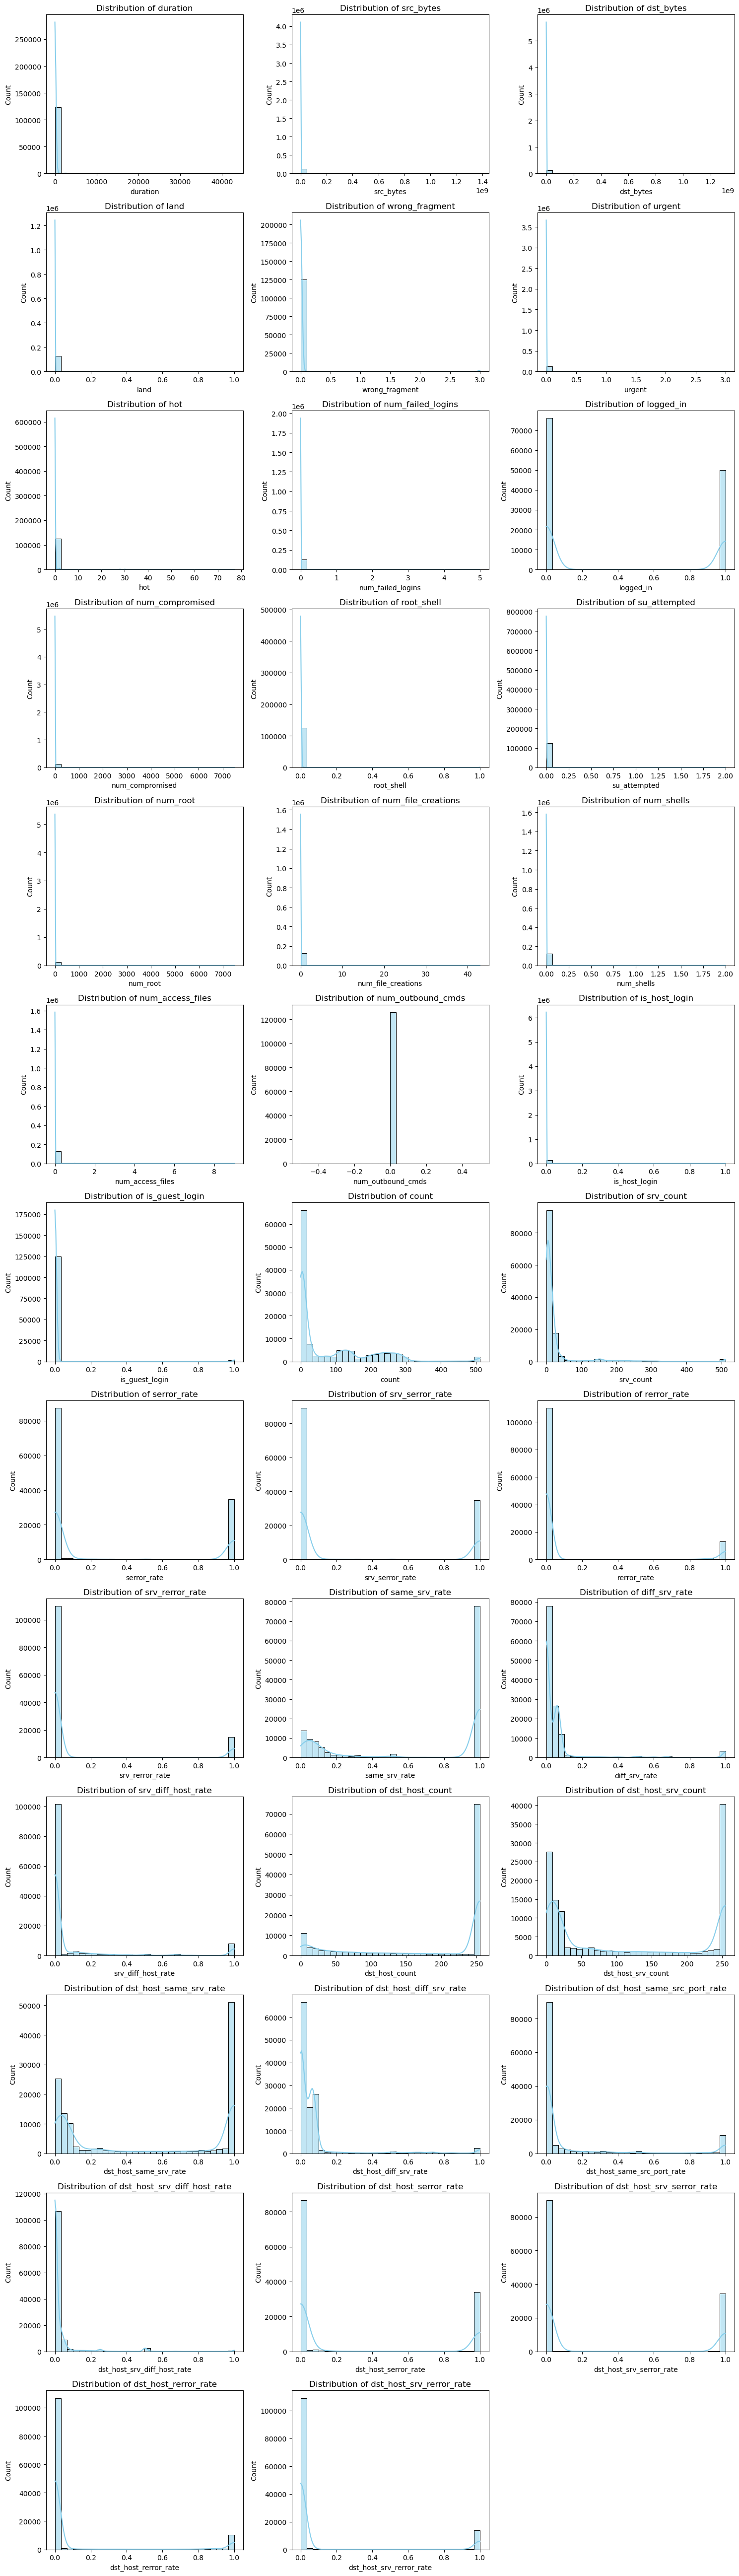

In [16]:
# 3 plots per row
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(15, n_rows * 4))  # Adjust height dynamically

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(train_df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

- **_# 2.Boxplot For Checking Quartile Distribution :_**

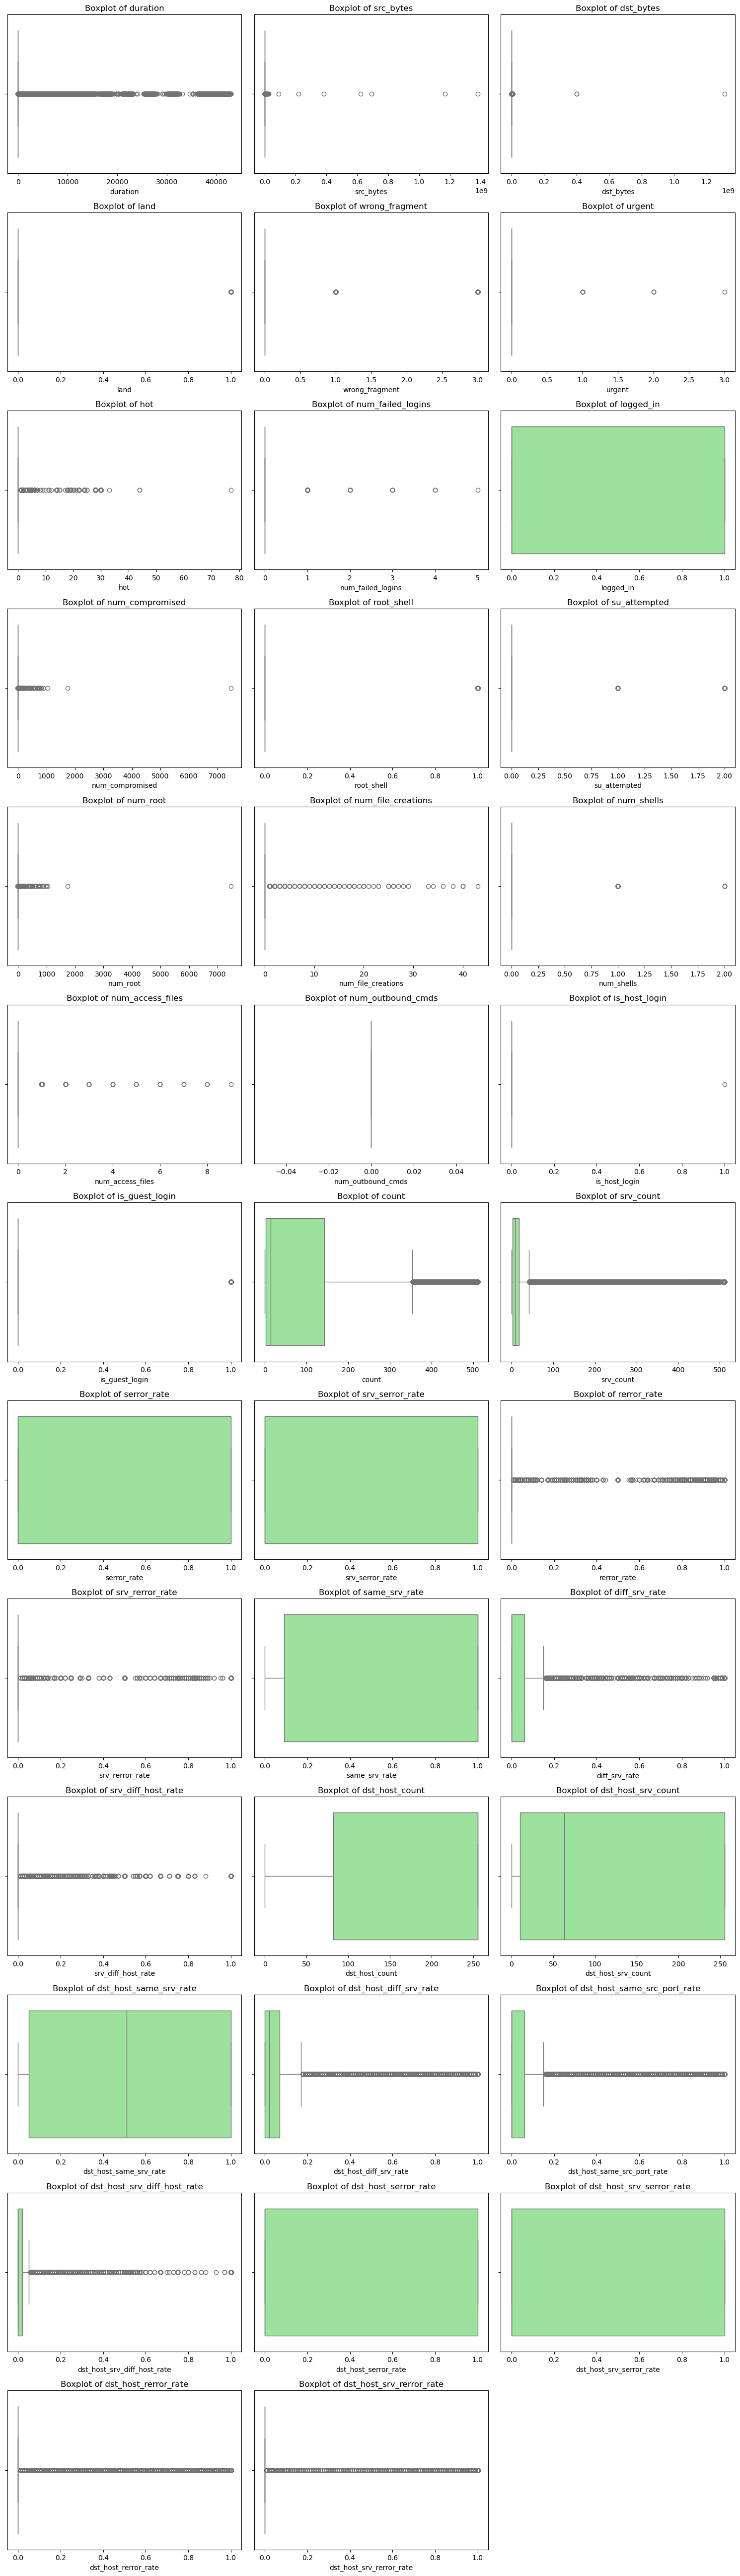

In [17]:
# 3 plots per row
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(15, n_rows * 4))  # Adjust height dynamically

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=train_df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

- **_# 3. Countplot For Categorical Columns :_**

In [18]:
cat_cols = train_df.select_dtypes(include='object')

In [19]:
for col in cat_cols:
    print(f"=== Value counts for '{col}' ===")
    print(train_df[col].value_counts())
    print("\n")  # Add space between columns

=== Value counts for 'protocol_type' ===
protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64


=== Value counts for 'service' ===
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64


=== Value counts for 'flag' ===
flag
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64


=== Value counts for 'label' ===
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53


## 📊 Categorical Feature & Label Insights

- **Protocol Type:** TCP dominates (102,689), followed by UDP (14,993) and ICMP (8,291).  
- **Service:** Top services are `http` (40,338), `private` (21,853), and `domain_u` (9,043); distribution is skewed.  
- **Flag:** `SF` is the most common (74,945), with other flags much rarer.  
- **Labels:** Normal traffic is majority (67,343). Most frequent attacks: `neptune` (41,214), `satan` (3,633), `ipsweep` (3,599). Rare attacks have very few samples (<10).  

**Observation:** Features and labels are highly imbalanced; consider encoding categorical variables and handling class imbalance for model training.


- **_# 4. Correlational Heatmap :_**

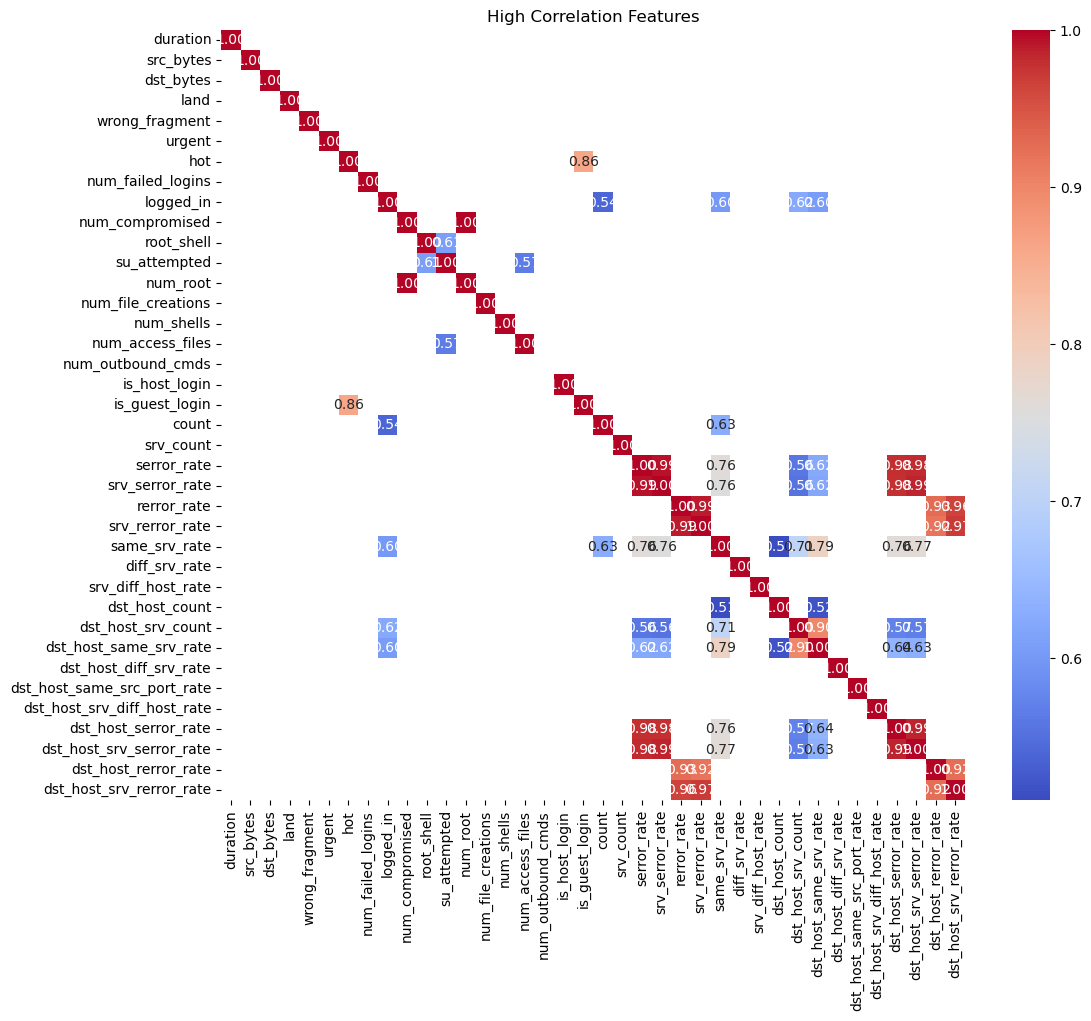

In [20]:
# columns having correlation greater than 0.5
corr = train_df[num_cols].corr().abs()  # absolute correlation
high_corr = corr[corr > 0.5]  # keep only correlations >0.5
plt.figure(figsize=(12,10))
sns.heatmap(high_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("High Correlation Features")
plt.show()

#### First let's try to find 10 or 15 imp features with respect to target : 

In [21]:
temp_df = train_df.copy()
temp_df['label_enc'] = LabelEncoder().fit_transform(temp_df['label'])

# Compute correlation with target
corr_target = temp_df[num_cols].corrwith(temp_df['label_enc']).abs().sort_values(ascending=False)
top_features = corr_target.head(10).index  # pick top 10
print(top_features)

Index(['dst_host_srv_serror_rate', 'srv_serror_rate', 'dst_host_serror_rate',
       'serror_rate', 'srv_count', 'wrong_fragment', 'dst_host_diff_srv_rate',
       'same_srv_rate', 'dst_host_srv_diff_host_rate', 'diff_srv_rate'],
      dtype='object')


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


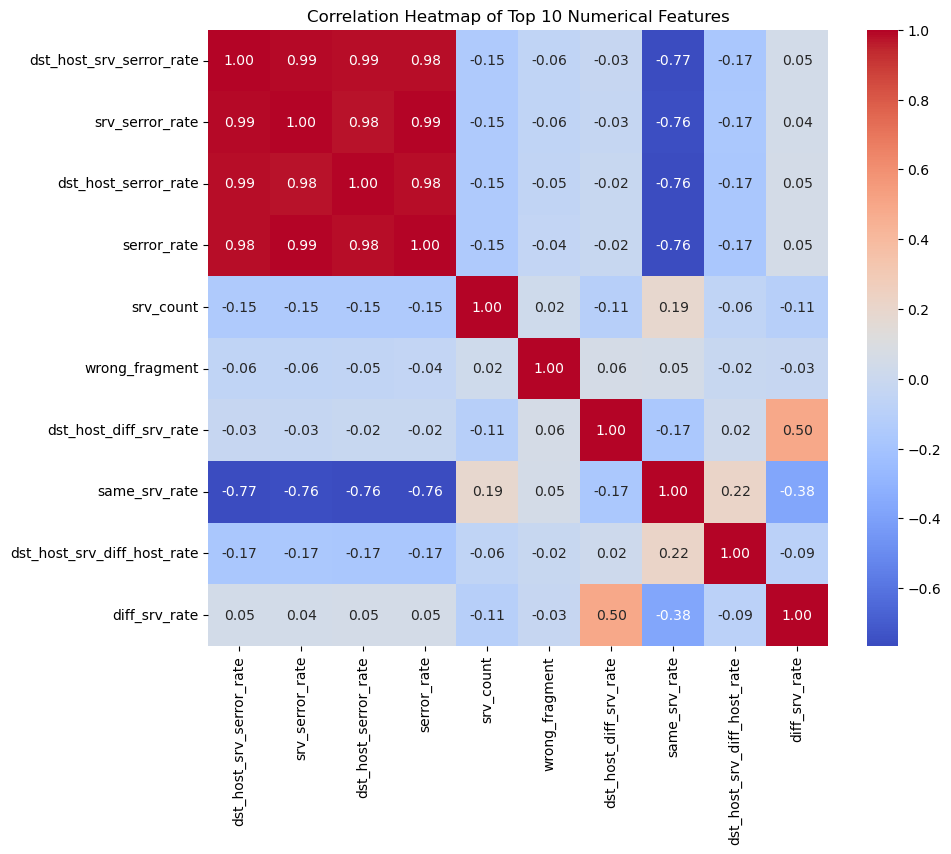

In [22]:
# Plot correlation heatmap for top 10 features
plt.figure(figsize=(10,8))
sns.heatmap(temp_df[top_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Top 10 Numerical Features")
plt.xticks()
plt.show()

## 🔍 Insights from Correlation Heatmap

- **High Multicollinearity:** Error rate features (`dst_host_srv_serror_rate`, `srv_serror_rate`, `dst_host_serror_rate`, `serror_rate`) are highly correlated (>0.98). Only one should be used to avoid redundancy.  
- **Strong Negative Correlation:** Error rates negatively correlate with `same_srv_rate` (-0.76), as expected.  
- **Moderate Relationships:** `dst_host_srv_diff_host_rate` and `diff_srv_rate` show a moderate positive correlation (0.50). `srv_count` is mostly independent.  
- **Modeling Implication:** Drop redundant features from highly correlated groups to maintain model stability.

In [23]:
# Define mapping
attack_mapping = {
    'normal': 'Normal',
    'neptune': 'DoS', 'smurf': 'DoS', 'pod': 'DoS', 'teardrop': 'DoS', 'land': 'DoS',
    'ipsweep': 'Probe', 'nmap': 'Probe', 'satan': 'Probe', 'portsweep': 'Probe',
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'phf': 'R2L', 
    'multihop': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L',
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'rootkit': 'U2R', 'perl': 'U2R', 'spy': 'U2R'
}

# Apply mapping
temp_df['label_group'] = temp_df['label'].map(attack_mapping)

C:\Users\Prakhar Dwivedi\AppData\Local\Temp\ipykernel_20392\1221862160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_group', y=col, data=temp_df, palette='pastel')
C:\Users\Prakhar Dwivedi\AppData\Local\Temp\ipykernel_20392\1221862160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_group', y=col, data=temp_df, palette='pastel')
C:\Users\Prakhar Dwivedi\AppData\Local\Temp\ipykernel_20392\1221862160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_group', y=col, data=temp_df, palette='pastel')
C:\Users\P

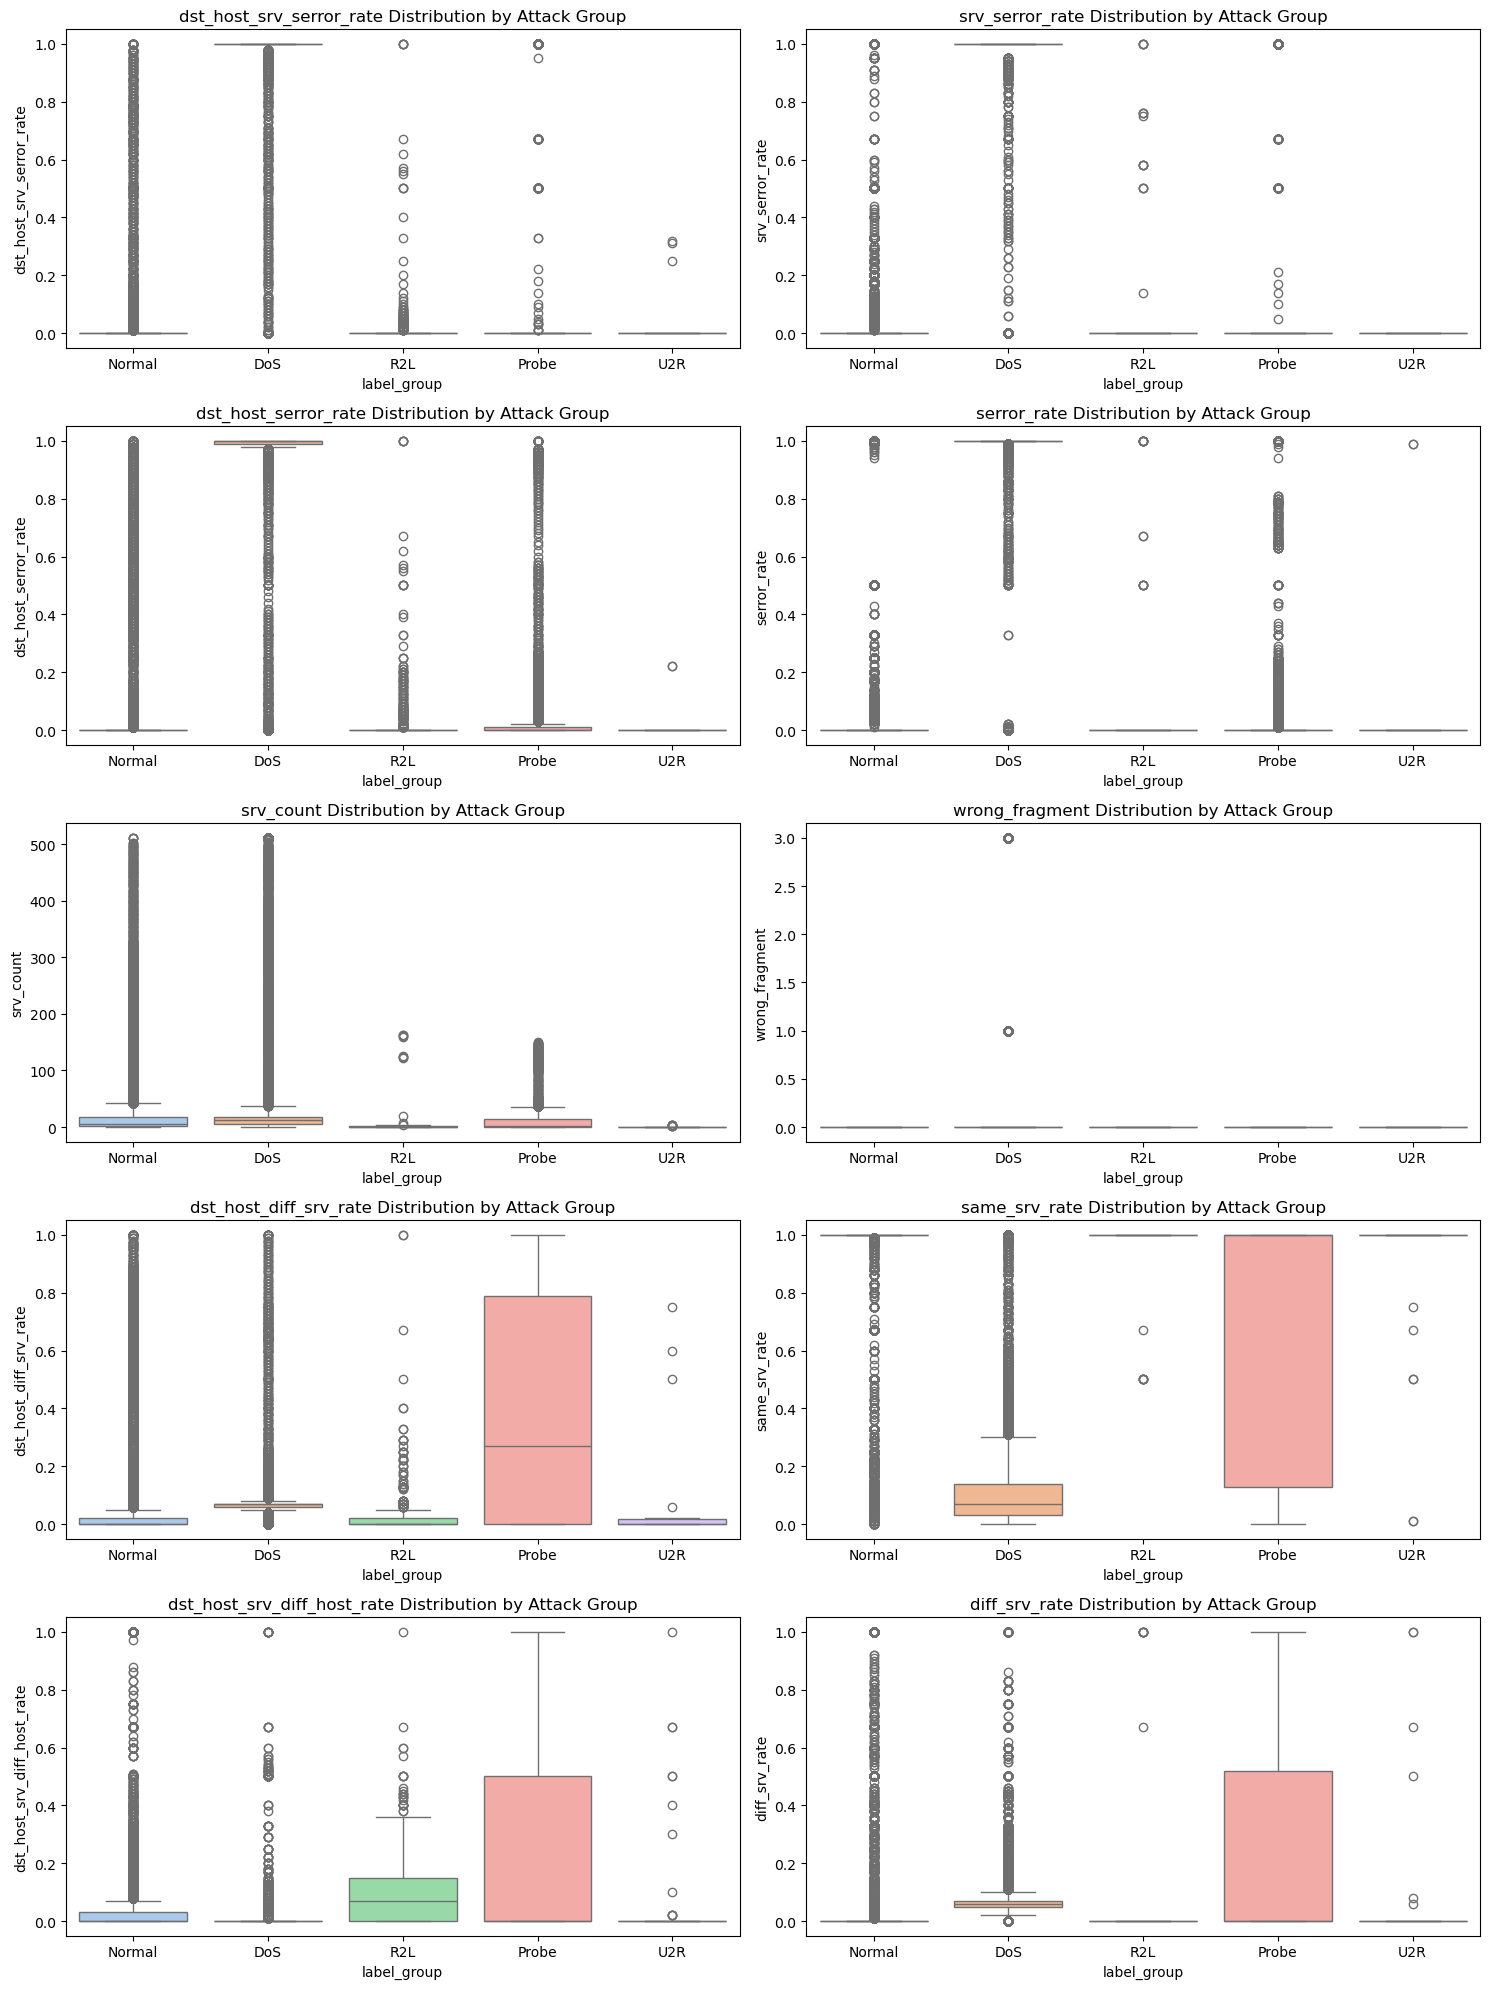

In [24]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(top_features):
    plt.subplot(5, 2, i+1)  # 5 rows, 2 columns for 10 features
    sns.boxplot(x='label_group', y=col, data=temp_df, palette='pastel')
    plt.title(f"{col} Distribution by Attack Group")
plt.tight_layout()
plt.show()

## 🔍 Insights from Attack Group Distributions

- **DoS Attacks Stand Out:** High error rates (median ≈ 1.0) make error-related features highly predictive for DoS.  
- **Probe Attacks:** Characterized by high `diff_srv_rate` and `dst_host_srv_diff_host_rate` and low `same_srv_rate`.  
- **Key Indicators for Other Attacks:** `wrong_fragment` is a strong signal for DoS and U2R attacks.  
- **Predictive Power:** Clear separation in these features indicates strong usefulness for classification.  
- **Limited Usefulness:** Features like `srv_count` have broad distributions and are less discriminative.


## NSL-KDD Attack Categories

The NSL-KDD dataset labels each network connection as either **Normal** or one of several **attack types**. For visualization and analysis, we group attacks into **five main categories**:

| **Category** | **Included Labels** | **Description** |
|--------------|------------------|----------------|
| **Normal** | normal | Safe network connections without any attack. |
| **DoS (Denial of Service)** | neptune, smurf, pod, teardrop, land | Attempts to make a system unavailable to legitimate users by overwhelming it with traffic or exploiting vulnerabilities. |
| **Probe** | ipsweep, nmap, satan, portsweep | Reconnaissance attacks that scan and gather information about the network. |
| **R2L (Remote to Local)** | ftp_write, guess_passwd, imap, phf, multihop, warezclient, warezmaster | Attacks where the attacker does not have local access but tries to gain it remotely, often by exploiting vulnerabilities or guessing credentials. |
| **U2R (User to Root)** | buffer_overflow, loadmodule, rootkit, perl, spy | Attacks where a local user tries to gain root/admin privileges by exploiting system vulnerabilities. |

> **Note:** Grouping these labels helps make visualizations and analyses more meaningful, especially when there are many specific attack types in the dataset.


# Class Distribution on the Target Column : 

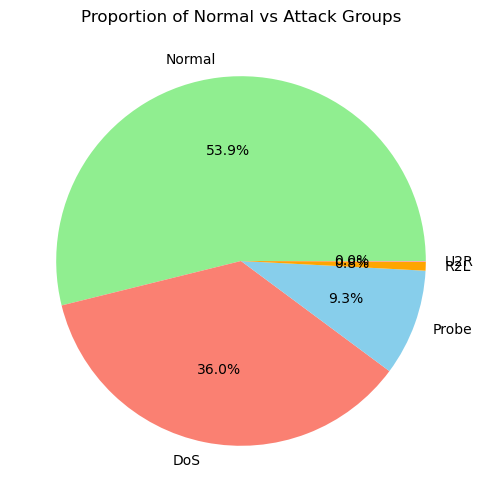

In [25]:
colors = ['lightgreen', 'salmon', 'skyblue', 'orange', 'violet']
temp_df['label_group'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=colors
)
plt.title("Proportion of Normal vs Attack Groups")
plt.ylabel("")
plt.show()

In [26]:
crosstab_percent = pd.crosstab(index=temp_df['label_group'], columns='percent', normalize=True) * 100
crosstab_percent

col_0,percent
label_group,
DoS,35.971908
Normal,53.867074
Probe,9.323532
R2L,0.794292
U2R,0.043194


**Observation:** The dataset is highly imbalanced, with Normal and DoS classes dominating, while R2L and U2R are extremely rare. This may require balancing techniques (e.g., SMOTE, class weighting) for effective modeltraining.

### let's do encoding for the categorical column and grouping classes in the label column for multiclass classification : 

In [27]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [28]:
# Define mapping
attack_mapping = {
    'normal': 'Normal',
    'neptune': 'DoS', 'smurf': 'DoS', 'pod': 'DoS', 'teardrop': 'DoS', 'land': 'DoS',
    'ipsweep': 'Probe', 'nmap': 'Probe', 'satan': 'Probe', 'portsweep': 'Probe',
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'phf': 'R2L', 
    'multihop': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L',
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'rootkit': 'U2R', 'perl': 'U2R', 'spy': 'U2R'
}

# Apply mapping
train_df['Label'] = train_df['label'].map(attack_mapping).fillna('Other')

In [29]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,Label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS


In [30]:
train_df.drop(columns = 'label',axis=1,inplace=True)

In [31]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


# Encoding for the Label Column : 

In [32]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform label_group
train_df['label'] = le.fit_transform(train_df['Label'])

In [33]:
train_df['label'].unique()

array([1, 0, 4, 3, 2, 5])

In [34]:
train_df['Label'].unique()

array(['Normal', 'DoS', 'R2L', 'Probe', 'Other', 'U2R'], dtype=object)

In [35]:
train_df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [36]:
train_df['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [37]:
# encoding for the categorical column 
train_df['Protocol_type'] = le.fit_transform(train_df['protocol_type'])
train_df['Flag'] = le.fit_transform(train_df['flag'])

In [38]:
train_df['Protocol_type'].unique()

array([1, 2, 0])

In [39]:
train_df['Flag'].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [40]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label,label,Protocol_type,Flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,Normal,1,1,9
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,Normal,1,2,9
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,0,1,5
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,Normal,1,1,9
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,Normal,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,0,1,5
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,Normal,1,2,9
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.00,0.00,0.72,0.00,0.01,0.00,Normal,1,1,9
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,DoS,0,1,5


# Making The Dataframe for model training : 

In [41]:
# Encoded categorical columns
encoded_categorical = ['Protocol_type', 'Flag']

# Target column
target_column = 'label'

# Create the new dataframe
df_ml = train_df[encoded_categorical + top_features.tolist() + [target_column]].copy()
# Check the new dataframe
print(df_ml.head())
print("Shape:", df_ml.shape)

   Protocol_type  Flag  dst_host_srv_serror_rate  srv_serror_rate  \
0              1     9                      0.00              0.0   
1              2     9                      0.00              0.0   
2              1     5                      1.00              1.0   
3              1     9                      0.01              0.2   
4              1     9                      0.00              0.0   

   dst_host_serror_rate  serror_rate  srv_count  wrong_fragment  \
0                  0.00          0.0          2               0   
1                  0.00          0.0          1               0   
2                  1.00          1.0          6               0   
3                  0.03          0.2          5               0   
4                  0.00          0.0         32               0   

   dst_host_diff_srv_rate  same_srv_rate  dst_host_srv_diff_host_rate  \
0                    0.03           1.00                         0.00   
1                    0.60           

In [42]:
df_ml

,Protocol_type,Flag,dst_host_srv_serror_rate,srv_serror_rate,dst_host_serror_rate,serror_rate,srv_count,wrong_fragment,dst_host_diff_srv_rate,same_srv_rate,dst_host_srv_diff_host_rate,diff_srv_rate,label
0,1,9,0.00,0.0,0.00,0.0,2,0,0.03,1.00,0.00,0.00,1
1,2,9,0.00,0.0,0.00,0.0,1,0,0.60,0.08,0.00,0.15,1
2,1,5,1.00,1.0,1.00,1.0,6,0,0.05,0.05,0.00,0.07,0
3,1,9,0.01,0.2,0.03,0.2,5,0,0.00,1.00,0.04,0.00,1
4,1,9,0.00,0.0,0.00,0.0,32,0,0.00,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,5,1.00,1.0,1.00,1.0,25,0,0.06,0.14,0.00,0.06,0
125969,2,9,0.00,0.0,0.00,0.0,2,0,0.01,1.00,0.00,0.00,1
125970,1,9,0.00,0.0,0.72,0.0,1,0,0.06,1.00,0.00,0.00,1
125971,1,5,1.00,1.0,1.00,1.0,8,0,0.05,0.06,0.00,0.05,0


# ML Model Building : 

- **_# 1.Preparing The Dataset For Ml :_**

In [43]:
X = df_ml.drop(["label"], axis=1)  # features 
y = df_ml["label"]                  # target 

- **_# 2. Splitting the Dataset into Training and Testing :_**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
X

,Protocol_type,Flag,dst_host_srv_serror_rate,srv_serror_rate,dst_host_serror_rate,serror_rate,srv_count,wrong_fragment,dst_host_diff_srv_rate,same_srv_rate,dst_host_srv_diff_host_rate,diff_srv_rate
0,1,9,0.00,0.0,0.00,0.0,2,0,0.03,1.00,0.00,0.00
1,2,9,0.00,0.0,0.00,0.0,1,0,0.60,0.08,0.00,0.15
2,1,5,1.00,1.0,1.00,1.0,6,0,0.05,0.05,0.00,0.07
3,1,9,0.01,0.2,0.03,0.2,5,0,0.00,1.00,0.04,0.00
4,1,9,0.00,0.0,0.00,0.0,32,0,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,5,1.00,1.0,1.00,1.0,25,0,0.06,0.14,0.00,0.06
125969,2,9,0.00,0.0,0.00,0.0,2,0,0.01,1.00,0.00,0.00
125970,1,9,0.00,0.0,0.72,0.0,1,0,0.06,1.00,0.00,0.00
125971,1,5,1.00,1.0,1.00,1.0,8,0,0.05,0.06,0.00,0.05


In [148]:
y

0         1
1         1
2         0
3         1
4         1
         ..
125968    0
125969    1
125970    1
125971    0
125972    1
Name: label, Length: 125973, dtype: int32

- **_# 3. Scaling the data :_**

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- **_# 4. Model Building And Evaluation of Their Results :_**

In [46]:
results = {}

In [47]:
print("\n===== Logistic Regression =====")
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

train_acc_log = accuracy_score(y_train, y_train_pred)
test_acc_log = accuracy_score(y_test, y_test_pred)
prec_log = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
rec_log = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

print(f"Train Accuracy: {train_acc_log:.4f}, Test Accuracy: {test_acc_log:.4f}")
print(f"Precision: {prec_log:.4f}, Recall: {rec_log:.4f}")


===== Logistic Regression =====
Train Accuracy: 0.9460, Test Accuracy: 0.9428
Precision: 0.9265, Recall: 0.9428


In [48]:
print("\n===== Decision Tree =====")
dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(X_train_scaled, y_train)

y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

train_acc_tree = accuracy_score(y_train, y_train_pred)
test_acc_tree = accuracy_score(y_test, y_test_pred)
prec_tree = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
rec_tree = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

print(f"Train Accuracy: {train_acc_tree:.4f}, Test Accuracy: {test_acc_tree:.4f}")
print(f"Precision: {prec_tree:.4f}, Recall: {rec_tree:.4f}")


===== Decision Tree =====
Train Accuracy: 0.9740, Test Accuracy: 0.9723
Precision: 0.9654, Recall: 0.9723


In [49]:
print("\n===== Random Forest =====")
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf.fit(X_train_scaled, y_train)

y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

train_acc_rf = accuracy_score(y_train, y_train_pred)
test_acc_rf = accuracy_score(y_test, y_test_pred)
prec_rf = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
rec_rf = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

print(f"Train Accuracy: {train_acc_rf:.4f}, Test Accuracy: {test_acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}, Recall: {rec_rf:.4f}")


===== Random Forest =====
Train Accuracy: 0.9742, Test Accuracy: 0.9725
Precision: 0.9656, Recall: 0.9725


In [50]:
print("\n===== Gradient Boosting =====")
gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb.fit(X_train_scaled, y_train)

y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)

train_acc_gb = accuracy_score(y_train, y_train_pred)
test_acc_gb = accuracy_score(y_test, y_test_pred)
prec_gb = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
rec_gb = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

print(f"Train Accuracy: {train_acc_gb:.4f}, Test Accuracy: {test_acc_gb:.4f}")
print(f"Precision: {prec_gb:.4f}, Recall: {rec_gb:.4f}")


===== Gradient Boosting =====
Train Accuracy: 0.9831, Test Accuracy: 0.9813
Precision: 0.9804, Recall: 0.9813


In [51]:
# ml model df 
# Create final results DataFrame (long format) for the classification models
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Train Accuracy': [train_acc_log, train_acc_tree, train_acc_rf, train_acc_gb],
    'Test Accuracy': [test_acc_log, test_acc_tree, test_acc_rf, test_acc_gb],
    'Precision': [prec_log, prec_tree, prec_rf, prec_gb],
    'Recall': [rec_log, rec_tree, rec_rf, rec_gb]
})

results_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall
0,Logistic Regression,0.946020,0.942806,0.926457,0.942806
1,Decision Tree,0.974002,0.972336,0.965398,0.972336
2,Random Forest,0.974161,0.972534,0.965598,0.972534
3,Gradient Boosting,0.983121,0.981346,0.980434,0.981346


# Ann Model Building Phase : 

In [52]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

- **_#1.Define the Ann Architecture :_**

In [65]:
#tf.keras.backend.clear_session()

In [53]:
ann_clf = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(y_train_cat.shape[1], activation='softmax')  # output layer for multiclass
])

- **_# 2.Compiling the model :_**

In [54]:
ann_clf.compile(
    optimizer='adam',
    loss='categorical_crossentropy',   # for multiclass
    metrics=['accuracy']
)

- **_# 3.Training the ANN :_**

In [55]:
history = ann_clf.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9576 - loss: 0.2236 - val_accuracy: 0.9689 - val_loss: 0.1623
Epoch 2/30
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9697 - loss: 0.1514 - val_accuracy: 0.9683 - val_loss: 0.1467
Epoch 3/30
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9703 - loss: 0.1394 - val_accuracy: 0.9707 - val_loss: 0.1372
Epoch 4/30
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9707 - loss: 0.1328 - val_accuracy: 0.9714 - val_loss: 0.1360
Epoch 5/30
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9712 - loss: 0.1282 - val_accuracy: 0.9709 - val_loss: 0.1295
Epoch 6/30
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9713 - loss: 0.1249 - val_accuracy: 0.9704 - val_loss: 0.1295
Epoch 7/30
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9719 - loss: 0.1217 - val_accuracy: 0.9724 - val_loss: 0.1277
Epoch 8/30
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9722 - loss: 0

## 🤖 ANN Model Training Results (Without Regularization & Dropout)

- **Training Setup:** 30 epochs, simple ANN without regularization or dropout.
- **Initial Learning:** Rapid improvement in first few epochs; training accuracy reached ~97% by epoch 5.
- **Final Performance:**
  - **Training Accuracy:** 97.44%
  - **Validation Accuracy:** 97.43%
  - **Training Loss:** 0.1003
  - **Validation Loss:** 0.1033
- **Observations:**
  - **Minimal Overfitting:** Training and validation loss curves are very close, but a slight risk of overfitting exists for longer training.
  - **Stability:** Accuracy plateaued after ~20 epochs, indicating convergence.
  - **Generalization:** Despite no regularization/dropout, model generalizes well on validation set.
- **Implication:** Further training beyond 30 epochs is unlikely to improve performance significantly.


- **_# 4. Evaluate the ANN :_** 

In [56]:
# Predict probabilities and convert to class labels
y_train_pred_prob = ann_clf.predict(X_train_scaled)
y_test_pred_prob  = ann_clf.predict(X_test_scaled)

# Convert one-hot back to class indices
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred  = np.argmax(y_test_pred_prob, axis=1)

# If your y_train_cat is one-hot encoded, convert back for evaluation
y_train_true = np.argmax(y_train_cat, axis=1)
y_test_true  = np.argmax(y_test_cat, axis=1)

# Create results dictionary
ann_results = {
    "Model": "ANN",
    "Train Accuracy": accuracy_score(y_train_true, y_train_pred),
    "Test Accuracy": accuracy_score(y_test_true, y_test_pred),
    "Precision": precision_score(y_test_true, y_test_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test_true, y_test_pred, average='weighted', zero_division=0),
}

print(ann_results)

3150/3150 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
{'Model': 'ANN', 'Train Accuracy': 0.9753319176804461, 'Test Accuracy': 0.975352252431038, 'Precision': 0.9735360555237185, 'Recall': 0.975352252431038}


In [57]:
# Convert ann_results to a DataFrame first
ann_results_df = pd.DataFrame([ann_results])

# Concatenate with existing results_df
results_df = pd.concat([results_df, ann_results_df], ignore_index=True)

print("\n===All Models Performance including ANN===")
results_df


===All Models Performance including ANN===


,Model,Train Accuracy,Test Accuracy,Precision,Recall
0,Logistic Regression,0.946020,0.942806,0.926457,0.942806
1,Decision Tree,0.974002,0.972336,0.965398,0.972336
2,Random Forest,0.974161,0.972534,0.965598,0.972534
3,Gradient Boosting,0.983121,0.981346,0.980434,0.981346
4,ANN,0.975332,0.975352,0.973536,0.975352


# Let's check the result with applying regularization to the Ann Model : 

- **_# 1. Defining The Architecture :_**

In [58]:
ann_clf_reg = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # input layer
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')  # output layer for multiclass
])

- **_# 2. Compiling the model :_** 

In [59]:
ann_clf_reg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

- **_# 3. Early Stopping And Callback :_**

In [60]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


- **_# 4. Training the Model :_**

In [61]:
history = ann_clf_reg.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9537 - loss: 0.2384 - val_accuracy: 0.9658 - val_loss: 0.1680
Epoch 2/100
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9651 - loss: 0.1694 - val_accuracy: 0.9668 - val_loss: 0.1528
Epoch 3/100
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9665 - loss: 0.1566 - val_accuracy: 0.9691 - val_loss: 0.1428
Epoch 4/100
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9672 - loss: 0.1503 - val_accuracy: 0.9692 - val_loss: 0.1396
Epoch 5/100
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9677 - loss: 0.1461 - val_accuracy: 0.9703 - val_loss: 0.1364
Epoch 6/100
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9684 - loss: 0.1429 - val_accuracy: 0.9704 - val_loss: 0.1322
Epoch 7/100
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9686 - loss: 0.1402 - val_accuracy: 0.9706 - val_loss: 0.1329
Epoch 8/100
2520/2520 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9686 -

## 🤖 ANN Model Training Results (With Regularization, Dropout & Early Stopping)

- **Training Setup:** 100 epochs, ANN with L2 regularization, dropout, and early stopping.
- **Initial Learning:** Rapid improvement in first 10–20 epochs; training accuracy crossed ~97% by epoch 10.
- **Final Performance (best validation epoch):**
  - **Training Accuracy:** ~97.22–97.20%
  - **Validation Accuracy:** ~97.38%
  - **Training Loss:** ~0.113–0.114
  - **Validation Loss:** ~0.103–0.104
- **Observations:**
  - **Stability & Regularization:** Training and validation loss remain very close, showing that regularization and dropout successfully prevented overfitting.
  - **Early Stopping:** Converged before 100 epochs, ensuring efficient training.
  - **Generalization:** Slightly better generalization than the simple ANN (without regularization), as validation loss is lower.
  - **Predictive Power:** High accuracy indicates the model effectively captures patterns in the data.
- **Implication:** Adding regularization, dropout, and early stopping improves robustness and prevents overfitting, while achieving nearly the same accuracy as the unregularized model.

- **_# 5. Evaluating The Model :_**

In [62]:
y_train_pred = np.argmax(ann_clf_reg.predict(X_train_scaled), axis=1)
y_test_pred = np.argmax(ann_clf_reg.predict(X_test_scaled), axis=1)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
rec = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("Classification Report:\n", classification_report(y_test, y_test_pred, zero_division=0))

3150/3150 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Train Accuracy: 0.9741
Test Accuracy: 0.9726
Precision: 0.9639
Recall: 0.9726
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8996
           1       0.96      0.99      0.98     13422
           2       1.00      0.03      0.06       185
           3       0.96      0.93      0.95      2357
           4       0.00      0.00      0.00       223
           5       0.00      0.00      0.00        12

    accuracy                           0.97     25195
   macro avg       0.65      0.49      0.50     25195
weighted avg       0.96      0.97      0.96     25195



# Visualization of Model Performance through epochs : 

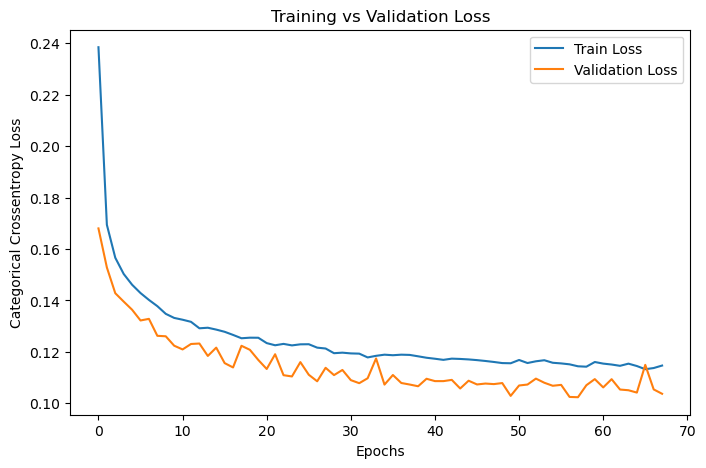

In [63]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

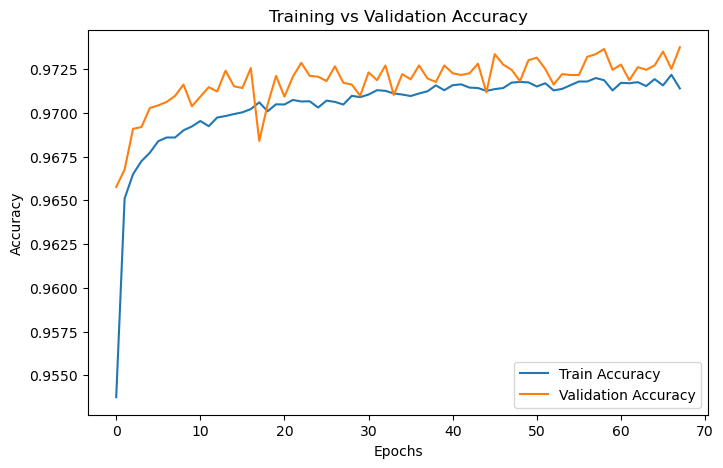

In [64]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Making THe Dataframe :  

In [65]:
ann_results_df2 = pd.DataFrame([{
    "Model": "ANN_Clf_Reg",
    "Train Accuracy": train_acc,
    "Test Accuracy": test_acc,
    "Precision": prec,
    "Recall": rec
}])

results_df = pd.concat([results_df, ann_results_df2], ignore_index=True)
print(results_df)

                 Model  Train Accuracy  Test Accuracy  Precision    Recall
0  Logistic Regression        0.946020       0.942806   0.926457  0.942806
1        Decision Tree        0.974002       0.972336   0.965398  0.972336
2        Random Forest        0.974161       0.972534   0.965598  0.972534
3    Gradient Boosting        0.983121       0.981346   0.980434  0.981346
4                  ANN        0.975332       0.975352   0.973536  0.975352
5          ANN_Clf_Reg        0.974121       0.972574   0.963926  0.972574


In [66]:
# Add F1-score column from precision and recall
results_df["F1-score"] = (2 * results_df["Precision"] * results_df["Recall"]) / (results_df["Precision"] + results_df["Recall"])

# Display updated results
print(results_df)

                 Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0  Logistic Regression        0.946020       0.942806   0.926457  0.942806   
1        Decision Tree        0.974002       0.972336   0.965398  0.972336   
2        Random Forest        0.974161       0.972534   0.965598  0.972534   
3    Gradient Boosting        0.983121       0.981346   0.980434  0.981346   
4                  ANN        0.975332       0.975352   0.973536  0.975352   
5          ANN_Clf_Reg        0.974121       0.972574   0.963926  0.972574   

   F1-score  
0  0.934560  
1  0.968854  
2  0.969054  
3  0.980890  
4  0.974443  
5  0.968231  


In [67]:
results_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.946020,0.942806,0.926457,0.942806,0.934560
1,Decision Tree,0.974002,0.972336,0.965398,0.972336,0.968854
2,Random Forest,0.974161,0.972534,0.965598,0.972534,0.969054
3,Gradient Boosting,0.983121,0.981346,0.980434,0.981346,0.980890
4,ANN,0.975332,0.975352,0.973536,0.975352,0.974443
5,ANN_Clf_Reg,0.974121,0.972574,0.963926,0.972574,0.968231


In [108]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


In [69]:
df_ml

,Protocol_type,Flag,dst_host_srv_serror_rate,srv_serror_rate,dst_host_serror_rate,serror_rate,srv_count,wrong_fragment,dst_host_diff_srv_rate,same_srv_rate,dst_host_srv_diff_host_rate,diff_srv_rate,label
0,1,9,0.00,0.0,0.00,0.0,2,0,0.03,1.00,0.00,0.00,1
1,2,9,0.00,0.0,0.00,0.0,1,0,0.60,0.08,0.00,0.15,1
2,1,5,1.00,1.0,1.00,1.0,6,0,0.05,0.05,0.00,0.07,0
3,1,9,0.01,0.2,0.03,0.2,5,0,0.00,1.00,0.04,0.00,1
4,1,9,0.00,0.0,0.00,0.0,32,0,0.00,1.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,5,1.00,1.0,1.00,1.0,25,0,0.06,0.14,0.00,0.06,0
125969,2,9,0.00,0.0,0.00,0.0,2,0,0.01,1.00,0.00,0.00,1
125970,1,9,0.00,0.0,0.72,0.0,1,0,0.06,1.00,0.00,0.00,1
125971,1,5,1.00,1.0,1.00,1.0,8,0,0.05,0.06,0.00,0.05,0


- **_# 1. Mapping The Label in Test Dataframe on Which The model is Trained :_**

In [109]:
attack_mapping = {
    'normal': 'Normal',
    'neptune': 'DoS', 'smurf': 'DoS', 'pod': 'DoS', 'teardrop': 'DoS', 'land': 'DoS',
    'ipsweep': 'Probe', 'nmap': 'Probe', 'satan': 'Probe', 'portsweep': 'Probe',
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'phf': 'R2L', 
    'multihop': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L',
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'rootkit': 'U2R', 'perl': 'U2R', 'spy': 'U2R'
}

test_df['Label'] = test_df['label'].map(attack_mapping).fillna('Other')

- **_# 2. Encoding of The Categorical Columns :_**

In [110]:
test_df['Protocol_type'] = le_protocol.transform(test_df['protocol_type'])
test_df['Flag'] = le_flag.transform(test_df['flag'])

- **_# 3. Selecting The Features on Which The model is Trained :_**

In [111]:
feature_cols = encoded_categorical + top_features.tolist()
X_test_final = test_df[feature_cols]

- **_# 4. Scaling of The Features :_**

In [112]:
X_test_scaled = scaler.transform(X_test_final)

- **_# 5. Encoding Of The Target Columns As THe model is Trained :_**

In [114]:
all_classes = ['Normal', 'DoS', 'Probe', 'R2L', 'U2R', 'Other']  # all possible classes
le_full = LabelEncoder()
le_full.fit(all_classes)

LabelEncoder()

In [115]:
y_test_final = le_full.transform(test_df['Label'])

- **_# 6. Extracting The class with max probability_**

In [116]:
y_test_pred_final = np.argmax(ann_clf_reg.predict(X_test_scaled), axis=1)

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


- **_# 7. Evaluating The model Performance on Test Data_**

In [117]:
test_acc = accuracy_score(y_test_final, y_test_pred_final)
prec = precision_score(y_test_final, y_test_pred_final, average='weighted', zero_division=0)
rec = recall_score(y_test_final, y_test_pred_final, average='weighted', zero_division=0)

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print("Classification Report:\n", classification_report(y_test_final, y_test_pred_final, zero_division=0))

Test Accuracy: 0.7037
Precision: 0.7070
Recall: 0.7037
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      5382
           1       0.63      0.97      0.77      9711
           2       1.00      0.00      0.00      4109
           3       0.55      0.99      0.70      1106
           4       0.00      0.00      0.00      2199
           5       0.00      0.00      0.00        37

    accuracy                           0.70     22544
   macro avg       0.52      0.49      0.41     22544
weighted avg       0.71      0.70      0.60     22544



- **_# 8. Making The Dataframe To See THe Actual vs Predicted Values :_**

In [120]:
results_df_test = test_df[['Label']].copy()
results_df_test['Predicted'] = le_full.inverse_transform(y_test_pred_final)
results_df_test.head(10)

,Label,Predicted
0,DoS,DoS
1,DoS,DoS
2,Normal,Normal
3,Other,Probe
4,Other,Probe
5,Normal,Normal
6,Normal,Normal
7,R2L,Normal
8,Normal,Normal
9,R2L,Normal


In [121]:
# Let's train an ann model after performming smote and see whether result increases or not 

# Againing Training an Ann model with smote because not working well on other test dataframe 

In [122]:
from imblearn.over_sampling import SMOTE
X1 = df_ml.drop("label", axis=1)
y1 = df_ml["label"]

- **_# 1. Applying Smote :_**

In [123]:
smote1 = SMOTE(random_state=42)
X_res1, y_res1 = smote1.fit_resample(X1, y1)

- **_# 2. Scaling :_**

In [124]:
scaler1 = StandardScaler()
X_res_scaled1 = scaler1.fit_transform(X_res1)

- **_# 3. Target To categorical for Multiclass Classification :_**

In [125]:
y_res_cat1 = to_categorical(y_res1)

- **_# 4. Computing The Class Wieghts :_**

In [126]:
classes1 = np.unique(y_res1)
from sklearn.utils.class_weight import compute_class_weight
weights1 = compute_class_weight('balanced', classes=classes1, y=y_res1)
class_weight_dict1 = dict(zip(classes1, weights1))

- **_# 5. Defining The Smote Ann Architecture :_**

In [127]:
ann_smote1 = Sequential([
    Input(shape=(X_res_scaled1.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer='l2'),
    Dropout(0.2),
    Dense(y_res_cat1.shape[1], activation='softmax')
])

- **_# 6. Compiling The model :_**

In [128]:
ann_smote1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [129]:
early_stop1 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [130]:
history1 = ann_smote1.fit(
    X_res_scaled1, y_res_cat1,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop1],
    class_weight=class_weight_dict1,
    verbose=1
)

Epoch 1/100
10102/10102 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - accuracy: 0.8200 - loss: 0.6037 - val_accuracy: 0.1568 - val_loss: 7.3530
Epoch 2/100
10102/10102 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - accuracy: 0.8793 - loss: 0.4435 - val_accuracy: 0.1536 - val_loss: 7.8984
Epoch 3/100
10102/10102 ━━━━━━━━━━━━━━━━━━━━ 62s 6ms/step - accuracy: 0.8925 - loss: 0.3993 - val_accuracy: 0.1577 - val_loss: 7.4687
Epoch 4/100
10102/10102 ━━━━━━━━━━━━━━━━━━━━ 81s 6ms/step - accuracy: 0.8974 - loss: 0.3770 - val_accuracy: 0.1545 - val_loss: 7.4736
Epoch 5/100
10102/10102 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - accuracy: 0.8998 - loss: 0.3633 - val_accuracy: 0.1486 - val_loss: 7.5278
Epoch 6/100
10102/10102 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - accuracy: 0.9022 - loss: 0.3547 - val_accuracy: 0.1471 - val_loss: 7.4071
Epoch 7/100
10102/10102 ━━━━━━━━━━━━━━━━━━━━ 60s 6ms/step - accuracy: 0.9034 - loss: 0.3488 - val_accuracy: 0.1454 - val_loss: 7.6259
Epoch 8/100
10102/10102 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step - ac

### Observations: ANN with SMOTE, Regularization, and Early Stopping

1. **Training Accuracy**
   - Starts at ~82% and gradually improves to ~90–91%.
   - Indicates the model learns well on the SMOTE-balanced training set.

2. **Validation Accuracy**
   - Remains very low (~15–16%) throughout training.
   - Shows poor generalization despite regularization and early stopping.

3. **Training vs Validation Loss**
   - Training loss decreases consistently (~0.6 → 0.32).
   - Validation loss remains very high (~7.0) and fluctuates, confirming overfitting.

4. **Effect of SMOTE**
   - Balances minority classes in training.
   - Model struggles on real distribution in validation, leading to low accuracy.

5. **Model Limitations**
   - Severe gap between training and validation performance.
   - Overfitting to synthetic SMOTE samples.
   - Possible feature issues or unsuitable network architecture.

6. **Recommendations**
   - Consider weighted loss instead of SMOTE.
   - Simplify network architecture or add batch normalization.
   - Check feature correlations and redundant features.
   - Ensure validation set reflects true class distribution.


# Extracting the class with max_probability : 

In [132]:
y_test_pred_final1 = np.argmax(ann_smote1.predict(X_test_scaled), axis=1)

705/705 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [133]:
test_acc_final1 = accuracy_score(y_test_final, y_test_pred_final1)
prec_final1 = precision_score(y_test_final, y_test_pred_final1, average='weighted', zero_division=0)
rec_final1 = recall_score(y_test_final, y_test_pred_final1, average='weighted', zero_division=0)

In [135]:
print(f"Final Test Accuracy: {test_acc_final1:.4f}")
print(f"Precision: {prec_final1:.4f}")
print(f"Recall: {rec_final1:.4f}")
print("Classification Report:\n", classification_report(y_test_final, y_test_pred_final1, zero_division=0))

Final Test Accuracy: 0.5855
Precision: 0.5824
Recall: 0.5855
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92      5382
           1       0.70      0.59      0.64      9711
           2       0.00      0.00      0.00      4109
           3       0.29      0.77      0.43      1106
           4       0.30      0.92      0.45      2199
           5       0.00      0.00      0.00        37

    accuracy                           0.59     22544
   macro avg       0.38      0.52      0.41     22544
weighted avg       0.58      0.59      0.56     22544



In [138]:
results_df2 = test_df[['Label']].copy()
results_df2['Predicted'] = le_full.inverse_transform(y_test_pred_final1)
print(results_df2.head(10))

    Label Predicted
0     DoS       DoS
1     DoS       DoS
2  Normal       R2L
3   Other     Probe
4   Other     Probe
5  Normal       R2L
6  Normal    Normal
7     R2L       R2L
8  Normal    Normal
9     R2L       R2L


- **_AS ann with regularization model performs better than the smote model as regulaization model has accuracy 70 on the testing dataframe where as smote one has 58 percent accuracy so i am dumping the ann_clf_reg model :_**

In [139]:
# Save the model-
ann_clf_reg.save("ann_cybersecurity_model.h5")


In [140]:
import joblib

In [142]:
joblib.dump(scaler, "scaler_cybersecurity")

['scaler_cybersecurity']

In [143]:
joblib.dump(le_protocol, "le_protocol_cyber")
joblib.dump(le_flag, "le_flag_cyber")

['le_flag_cyber']

In [145]:
joblib.dump(le, "label_encoder_cyber")

['label_encoder_cyber']

# Cybersecurity Intrusion Detection: Key Insights

- **Data & Preprocessing**:  
  NSL-KDD dataset (41 features) was preprocessed by One-Hot Encoding categorical variables and scaling numerical features with StandardScaler. No missing values were present, ensuring clean input for the ANN.

- **Why ANN**:  
  - **Captures Complex Patterns**: Models non-linear relationships in high-dimensional network traffic.  
  - **Scalable for Big Data**: Efficiently trains on large-scale traffic using GPUs, ideal for real-world IDS.

- **ML Model Performance**:

| Model                 | Train Accuracy | Test Accuracy | Precision | Recall | F1-score |
|-----------------------|----------------|---------------|-----------|--------|----------|
| Logistic Regression    | 0.9460        | 0.9428        | 0.9265    | 0.9428 | 0.9346   |
| Decision Tree          | 0.9740        | 0.9723        | 0.9654    | 0.9723 | 0.9689   |
| Random Forest          | 0.9742        | 0.9725        | 0.9656    | 0.9725 | 0.9691   |
| Gradient Boosting      | 0.9831        | 0.9813        | 0.9804    | 0.9813 | 0.9809   |
| ANN                    | 0.9753        | 0.9754        | 0.9735    | 0.9754 | 0.9744   |
| ANN_Clf_Reg            | 0.9741        | 0.9726        | 0.9639    | 0.9726 | 0.9682   |

- **Conclusion**:  
  ANN provides a reliable, accurate, and scalable solution for intrusion detection, effectively handling complex patterns in network traffic and outperforming traditional models in high-dimensional cybersecurity data.
